In [5]:
import numpy as np
from numpy.typing import ArrayLike, NDArray
from typing import Union, Any
import matplotlib.pyplot as plt

In [6]:
# the first tuple element is the time of day, second is the relative demand
# level at that time as a multiple of the average demand level
water_demand_sample = np.array([
    [0, 0.5],
    [3, 0.2],
    [6, 0.25],
    [7, 1.75],
    [12, 1.25],
    [13, 1.5],
    [14, 1.4],
    [16, 0.9],
    [18.5, 1.25],
    [19, 1.75],
    [20, 1.75],
    [24, 0.4],
])

In [7]:
np.mean(water_demand_sample[:, 1])

1.075

In [8]:
MINUTES_PER_DAY = 60 * 24

In [9]:
rng = np.random.default_rng(seed=42)

In [10]:
water_demand = np.interp(np.linspace(0, 24, MINUTES_PER_DAY), water_demand_sample[:, 0], water_demand_sample[:, 1]) + rng.normal(size=MINUTES_PER_DAY, scale=0.05)

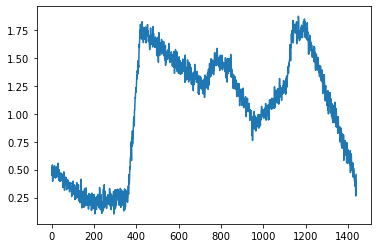

In [11]:
plt.plot(np.arange(MINUTES_PER_DAY), water_demand)

In [40]:
def relative_occupant_water_demand(t):
    """Given a the time of day in minutes t, returns the estimated factor of
    occupant water demand relative to average water demand."""

    t_whole_min = np.rint(t).astype(np.int32)
    return water_demand[t_whole_min]

In [13]:
def typical_building_water_demand(
    t: ArrayLike,
):
    """Given a time of day in minutes t, returns the estimated water consumption
    of a typical Manhattan building over 6 stories tall at that time, in liters
    per minute."""
    return (
        TYPICAL_BUILDING_MEAN_WATER_CONSUMPTION_LITER_PER_MINUTE
        * relative_occupant_water_demand(t)
    )


In [38]:
PER_PERSON_MEAN_WATER_CONSUMPTION_LITER_PER_DAY = 420.18
TYPICAL_BUILDING_N_PEOPLE = 255.68
TYPICAL_BUILDING_MEAN_WATER_CONSUMPTION_LITER_PER_DAY = PER_PERSON_MEAN_WATER_CONSUMPTION_LITER_PER_DAY * TYPICAL_BUILDING_N_PEOPLE
TYPICAL_BUILDING_MEAN_WATER_CONSUMPTION_LITER_PER_MINUTE = TYPICAL_BUILDING_MEAN_WATER_CONSUMPTION_LITER_PER_DAY / MINUTES_PER_DAY
TYPICAL_BUILDING_MEAN_WATER_CONSUMPTION_LITER_PER_MINUTE

74.60529333333334

# Jenny's code

Model the amount of water stored in the tank over the course of the day. This will be the sum of an integral of the inflow rate over time, the integral of the outflow rate over time, and the initial water level in the tank at the start of the day.
f(inflow, level, demand) [over a “control” interval] => level [=> new inflow, => new time of day => new demand]


In [14]:
from scipy import integrate

In [29]:
def flow_rate(volume, time):
    return volume / time

In [30]:
inflow_volume = 100
inflow_time = 10
outflow_volume = 80
outflow_time = 10

In [31]:
inflow = lambda x:x*flow_rate(inflow_volume, inflow_time)
outflow = lambda x:x*flow_rate(outflow_volume, outflow_time)

In [43]:
def tank_water_amount(inflow, outflow, initial, a, b):
    """Given inflow rate, outflow rate, initial water level, lower time bound a and upper time bound b,
    return amount of water that is stored in the tank."""
    
    inflow = lambda x: x*typical_building_water_demand(a)
    inflow_integral, inflow_error = integrate.quad(inflow, a, b)
    outflow_integral, outflow_error = integrate.quad(outflow, a, b)
    total_tank = inflow_integral - outflow_integral + initial # should be subtracting outflow
    
    return total_tank

In [44]:
vol = tank_water_amount(inflow, outflow, 50, 0, 10)

In [45]:
vol

1571.9661011302242